# ECON 140: Homework #1

## Executive Summary
In this report I, Brandon Concepcion, will help analyze the effectiveness of an educational presentation on the mean client profit generation using data from Isabelle's financial advisory practice. This is for the course, ECON 140: Econometrics, at UC Berkeley

---

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Setting the style for professional plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [97]:
df = pd.read_excel('isabelle.xlsx')

print("Dataset Overview:")
print(f"Total observations: {len(df)}")
print(f"Variables: {list(df.columns)}")
print("\nFirst 5 observations:")
df.head()

Dataset Overview:
Total observations: 500
Variables: ['client_id', 'presentation', 'male', 'age', 'monthly_income', 'profits']

First 5 observations:


,client_id,presentation,male,age,monthly_income,profits
0,498,0,1,65,1,684.158264
1,313,0,0,53,1,683.363525
2,278,0,1,55,1,683.675293
3,73,0,0,50,1,685.246277
4,85,0,1,50,1,682.944519


## 1. Initial Data Analysis: Distribution of Profits by Treatment Status

We begin by examining the distribution of profits for clients who received the educational presentation versus those who did not.

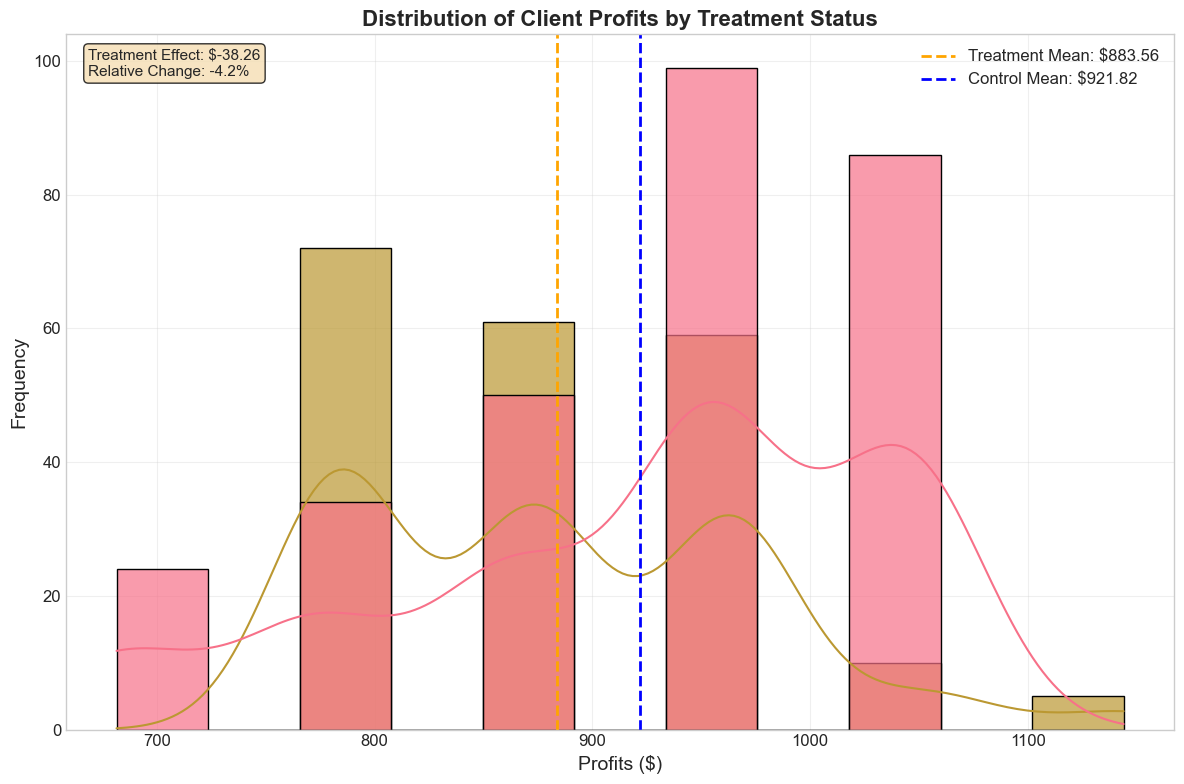


Summary Statistics:
Treatment group (presentation=1): Mean = $883.56, N = 207
Control group (presentation=0): Mean = $921.82, N = 293
Raw difference: $-38.26


In [116]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, x='profits', hue='presentation', alpha=0.7, kde=True, ax=ax)

treatment_mean = df[df['presentation'] == 1]['profits'].mean()
control_mean = df[df['presentation'] == 0]['profits'].mean()

ax.axvline(treatment_mean, color='orange', linestyle='--', linewidth=2, 
           label=f'Treatment Mean: ${treatment_mean:.2f}')
ax.axvline(control_mean, color='blue', linestyle='--', linewidth=2, 
           label=f'Control Mean: ${control_mean:.2f}')

ax.set_title('Distribution of Client Profits by Treatment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Profits ($)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

textstr = f'Treatment Effect: ${treatment_mean - control_mean:.2f}\n'
textstr += f'Relative Change: {((treatment_mean - control_mean)/control_mean)*100:.1f}%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Treatment group (presentation=1): Mean = ${treatment_mean:.2f}, N = {len(df[df['presentation']==1])}")
print(f"Control group (presentation=0): Mean = ${control_mean:.2f}, N = {len(df[df['presentation']==0])}")
print(f"Raw difference: ${treatment_mean - control_mean:.2f}")

### 1.1 Statistical Summary by Treatment Status

In [99]:
# Comprehensive statistical analysis
summary_stats = df.groupby('presentation')['profits'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max']).round(2)
summary_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Variance', 'Minimum', 'Maximum']

print("Detailed Summary Statistics by Treatment Status:")
print("=" * 60)
print(summary_stats)

treatment_group = df[df['presentation'] == 1]['profits']
control_group = df[df['presentation'] == 0]['profits']

Detailed Summary Statistics by Treatment Status:
              Count    Mean  Median  Std Dev  Variance  Minimum  Maximum
presentation                                                            
0               293  921.82  953.44   111.87  12514.06   681.49  1046.41
1               207  883.56  873.99    91.56   8382.95   781.71  1143.99


### 1.2 Box Plot Analysis

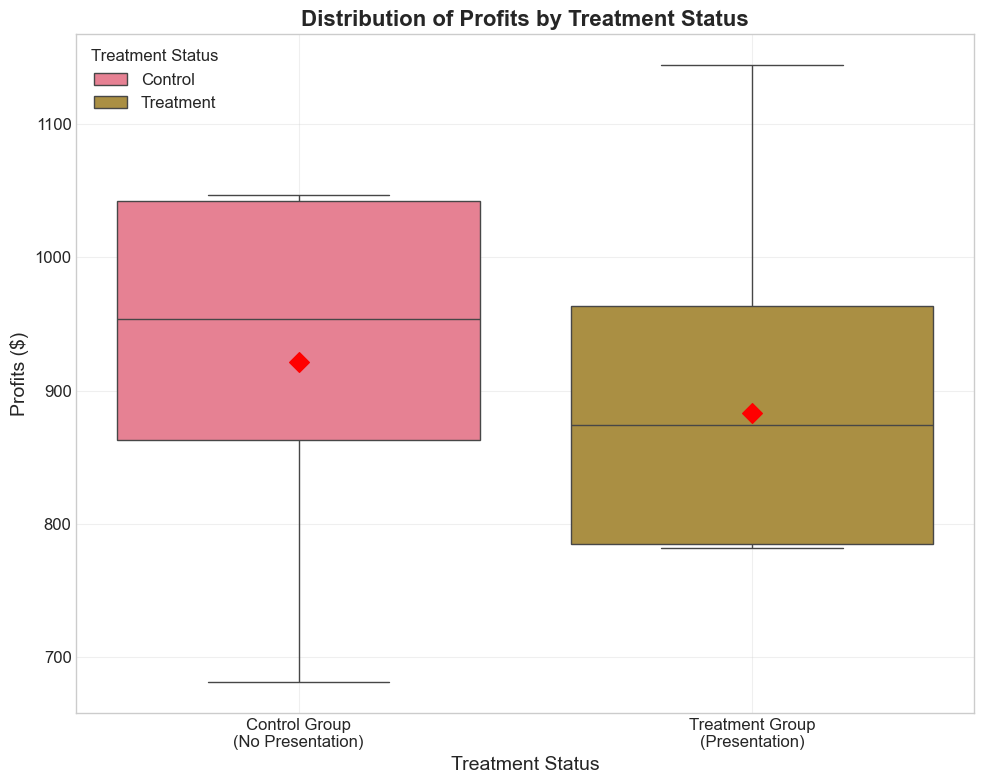


Quartile Analysis:
Control Group:
  Q1 (25th percentile): $863.06
  Q2 (Median): $953.44
  Q3 (75th percentile): $1042.61
  IQR: $179.56

Treatment Group:
  Q1 (25th percentile): $784.78
  Q2 (Median): $873.99
  Q3 (75th percentile): $963.55
  IQR: $178.77



In [100]:
fig, ax = plt.subplots(figsize=(10, 8))


sns.boxplot(data=df, x='presentation', y='profits', hue='presentation', ax=ax)

ax.set_title('Distribution of Profits by Treatment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Treatment Status', fontsize=14)
ax.set_ylabel('Profits ($)', fontsize=14)
ax.set_xticklabels(['Control Group\n(No Presentation)', 'Treatment Group\n(Presentation)'])
ax.legend(title='Treatment Status', labels=['Control', 'Treatment'])


treatment_mean = df[df['presentation'] == 1]['profits'].mean()
control_mean = df[df['presentation'] == 0]['profits'].mean()

ax.scatter([0], [control_mean], color='red', s=100, marker='D', label='Control Mean', zorder=5)
ax.scatter([1], [treatment_mean], color='red', s=100, marker='D', label='Treatment Mean', zorder=5)

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print quartile information
print("\nQuartile Analysis:")
print("=" * 40)
for group in [0, 1]:
    group_name = "Control" if group == 0 else "Treatment"
    group_data = df[df['presentation'] == group]['profits']
    q1, q2, q3 = group_data.quantile([0.25, 0.5, 0.75])
    print(f"{group_name} Group:")
    print(f"  Q1 (25th percentile): ${q1:.2f}")
    print(f"  Q2 (Median): ${q2:.2f}")
    print(f"  Q3 (75th percentile): ${q3:.2f}")
    print(f"  IQR: ${q3 - q1:.2f}")
    print()

### 1.3 Mean Comparison Visualization

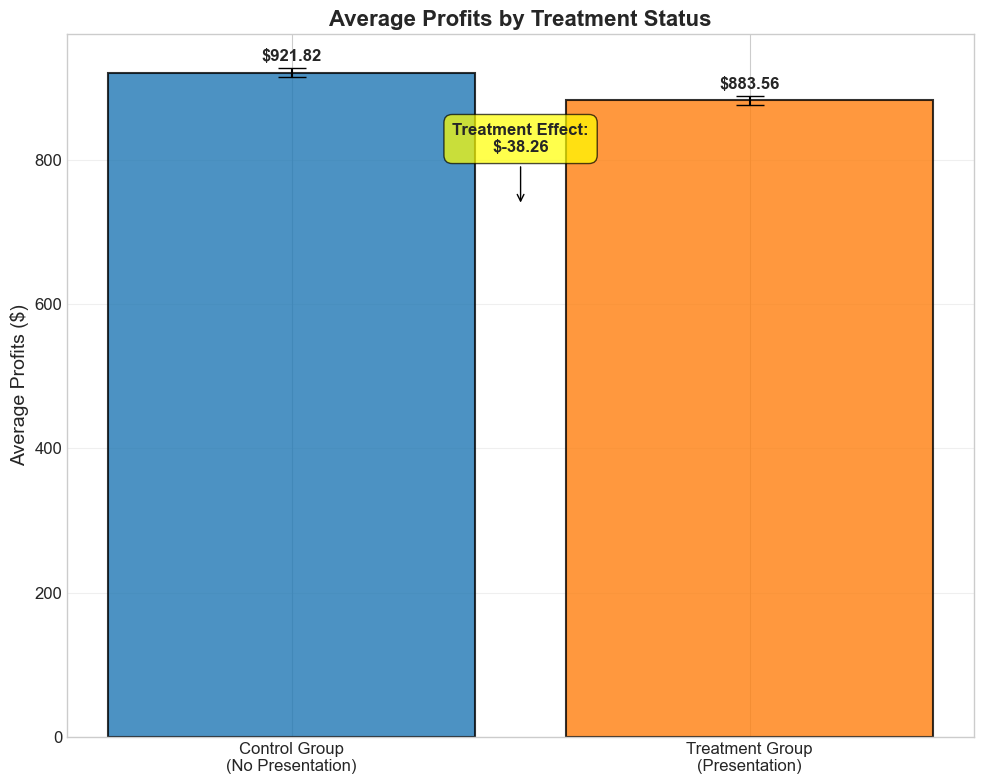

Treatment Effect Analysis:
Control group mean: $921.82 ± $6.54
Treatment group mean: $883.56 ± $6.36
Absolute difference: $-38.26
Relative difference: -4.2%


In [117]:
fig, ax = plt.subplots(figsize=(10, 8))

means = df.groupby('presentation')['profits'].agg(['mean', 'std', 'count'])
means['se'] = means['std'] / np.sqrt(means['count'])

bars = ax.bar(['Control Group\n(No Presentation)', 'Treatment Group\n(Presentation)'], 
              means['mean'], 
              yerr=means['se'], 
              capsize=10, 
              color=['#1f77b4', '#ff7f0e'], 
              alpha=0.8,
              edgecolor='black',
              linewidth=1.5)


for i, (bar, mean_val) in enumerate(zip(bars, means['mean'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + means['se'].iloc[i] + 5,
            f'${mean_val:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')


ax.set_title('Average Profits by Treatment Status', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Profits ($)', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

treatment_effect = means['mean'].iloc[1] - means['mean'].iloc[0]
ax.annotate(f'Treatment Effect:\n${treatment_effect:.2f}', 
            xy=(0.5, max(means['mean']) * 0.8), 
            xytext=(0.5, max(means['mean']) * 0.9),
            ha='center', va='center',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

print("Treatment Effect Analysis:")
print("=" * 40)
print(f"Control group mean: ${means['mean'].iloc[0]:.2f} ± ${means['se'].iloc[0]:.2f}")
print(f"Treatment group mean: ${means['mean'].iloc[1]:.2f} ± ${means['se'].iloc[1]:.2f}")
print(f"Absolute difference: ${treatment_effect:.2f}")
print(f"Relative difference: {(treatment_effect/means['mean'].iloc[0])*100:.1f}%")

### 1.4 Initial Findings

The initial analysis reveals a counterintuitive result: clients who received the educational presentation tend to show lower average profits compared to those who did not receive the presentation.

## 2. Heterogeneity Analysis

Now we will now examine how the presentation's effectiveness varies across different client characteristics.


TREATMENT EFFECTS BY GENDER
                         mean      median         std           var  count
male presentation                                                         
0    0             909.531834  953.013214  115.330104  13301.032923    118
     1             881.217237  874.059967   91.339119   8342.834657     74
1    0             930.109960  953.759155  109.019683  11885.291388    175
     1             884.865601  873.980713   91.999212   8463.854984    133


<Axes: xlabel='male', ylabel='mean'>

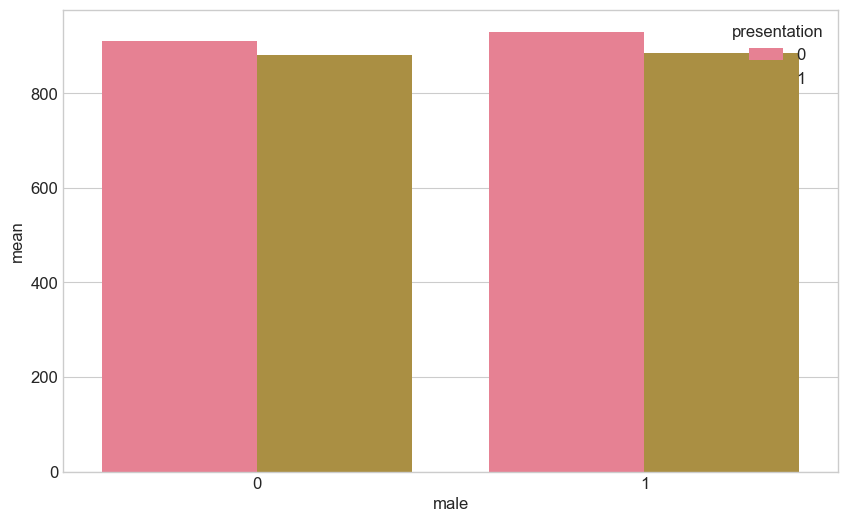

In [106]:
print("\n" + "="*50)
print("TREATMENT EFFECTS BY GENDER")
print("="*50)

grouped_male_prez = df.groupby(["male", "presentation"])["profits"].agg(['mean', 'median', 'std', 'var', 'count'])
print(grouped_male_prez)

sns.barplot(data=grouped_male_prez, x='male', y='mean', hue='presentation')

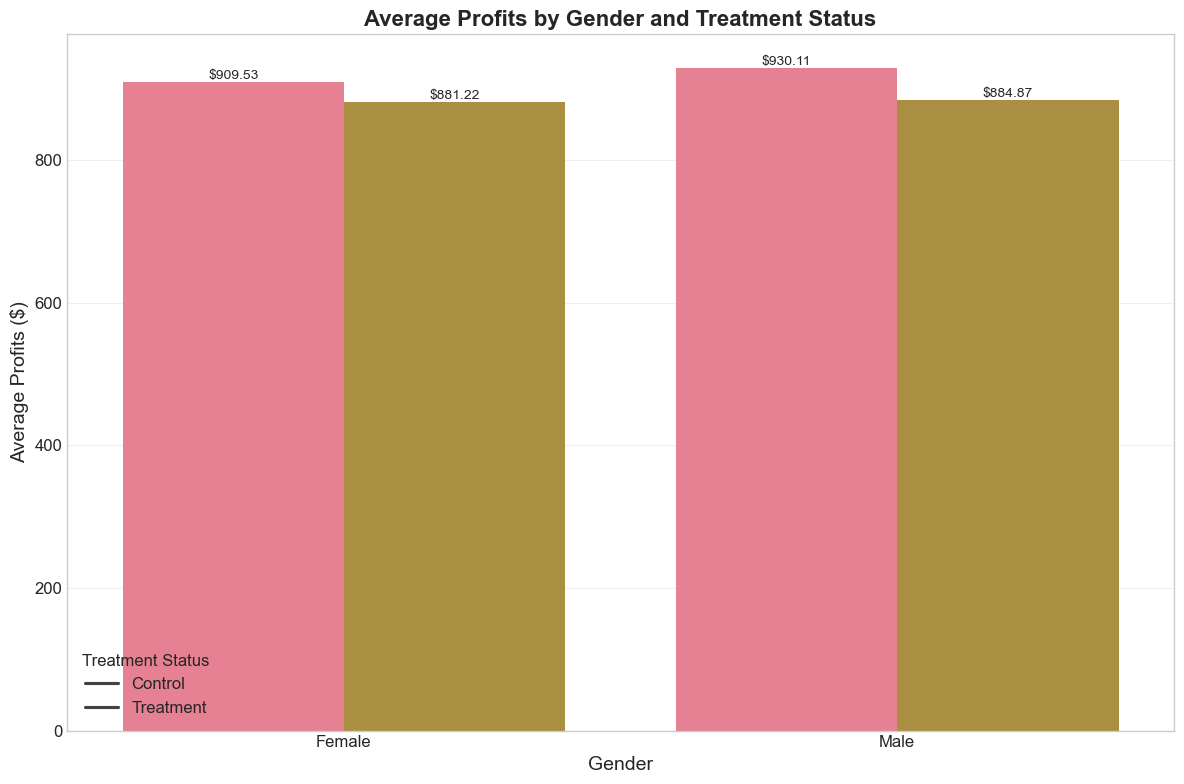


Treatment Effects by Gender:
Female: $-28.31 (-3.1%)
Male: $-45.24 (-4.9%)


In [107]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_data = grouped_male_prez.reset_index()

sns.barplot(data=plot_data, x='male', y='mean', hue='presentation', ax=ax)

ax.set_title('Average Profits by Gender and Treatment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Average Profits ($)', fontsize=14)
ax.set_xticklabels(['Female', 'Male'])
ax.legend(title='Treatment Status', labels=['Control', 'Treatment'])

for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', fontsize=10)

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nTreatment Effects by Gender:")
print("=" * 40)
for gender in [0, 1]:
    gender_name = "Female" if gender == 0 else "Male"
    control_mean = plot_data[(plot_data['male'] == gender) & (plot_data['presentation'] == 0)]['mean'].iloc[0]
    treatment_mean = plot_data[(plot_data['male'] == gender) & (plot_data['presentation'] == 1)]['mean'].iloc[0]
    effect = treatment_mean - control_mean
    print(f"{gender_name}: ${effect:.2f} ({(effect/control_mean)*100:.1f}%)")

### 2.1 Treatment Effects by Income Level

Now we will examine treatment effects across different income groups.


TREATMENT EFFECTS BY MONTHLY INCOME
                                    mean       median       std       var  \
monthly_income presentation                                                 
1              0              684.177172   684.141113  1.078789  1.163785   
               1              784.189813   784.191681  1.038746  1.078994   
2              0              773.541044   773.547638  0.978281  0.957033   
               1              873.810304   873.980713  0.916029  0.839110   
3              0              863.655680   863.892365  1.301399  1.693639   
               1              964.017479   964.003235  1.088817  1.185523   
4              0              953.721953   953.757202  1.162701  1.351873   
               1             1053.780652  1053.815613  1.060709  1.125103   
5              0             1043.861562  1043.827148  1.090120  1.188361   
               1             1143.653516  1143.715698  0.262395  0.068851   

                             count  
mo

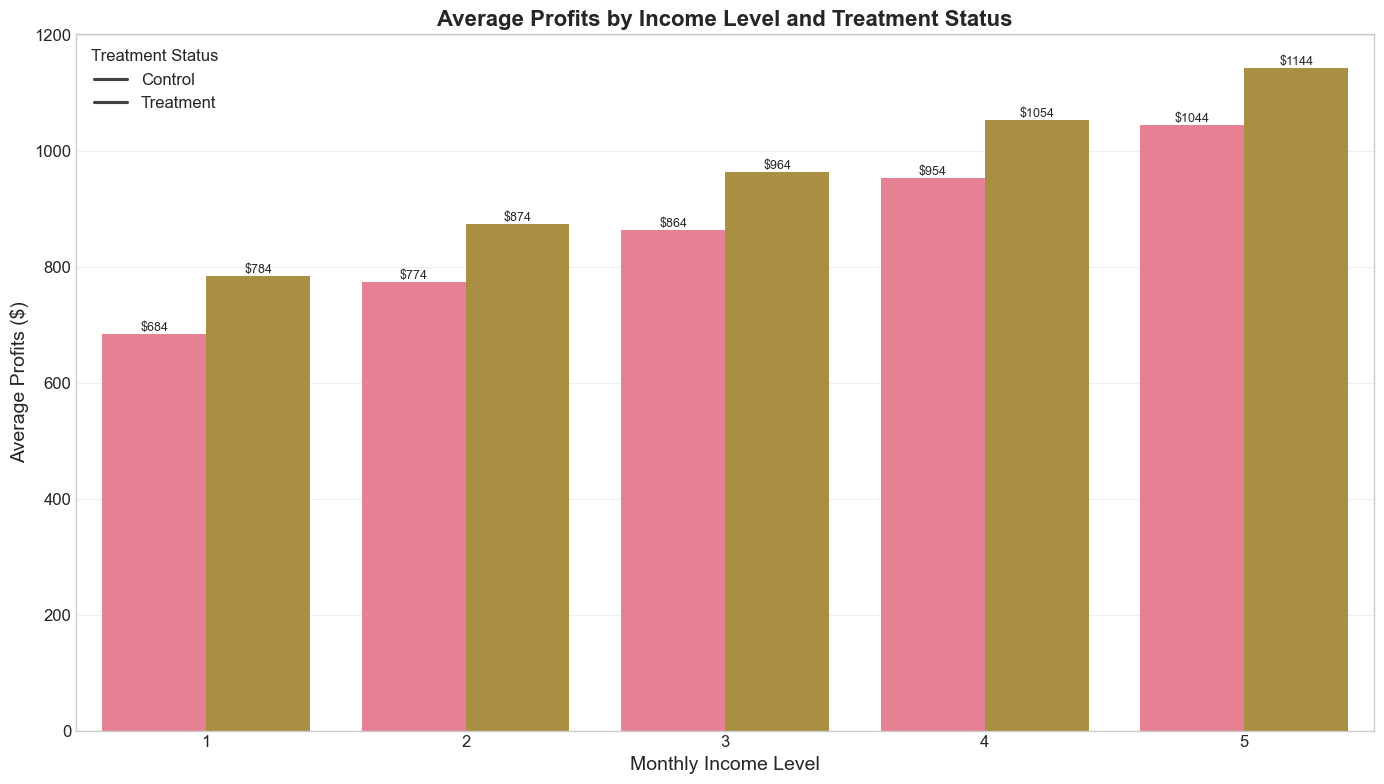


Treatment Effects by Income Level:
Income Level 1: $100.01 (14.6%)
Income Level 2: $100.27 (13.0%)
Income Level 3: $100.36 (11.6%)
Income Level 4: $100.06 (10.5%)
Income Level 5: $99.79 (9.6%)


In [115]:
print("="*60)
print("TREATMENT EFFECTS BY MONTHLY INCOME")
print("="*60)

grouped_income_prez = df.groupby(["monthly_income", "presentation"])["profits"].agg(['mean', 'median', 'std', 'var', 'count'])
print(grouped_income_prez)

fig, ax = plt.subplots(figsize=(14, 8))

plot_data_income = grouped_income_prez.reset_index()

sns.barplot(data=plot_data_income, x='monthly_income', y='mean', hue='presentation', ax=ax)

ax.set_title('Average Profits by Income Level and Treatment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Monthly Income Level', fontsize=14)
ax.set_ylabel('Average Profits ($)', fontsize=14)
ax.legend(title='Treatment Status', labels=['Control', 'Treatment'])

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', fontsize=9)

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nTreatment Effects by Income Level:")
print("=" * 50)
for income in sorted(df['monthly_income'].unique()):
    control_mean = plot_data_income[(plot_data_income['monthly_income'] == income) & (plot_data_income['presentation'] == 0)]['mean'].iloc[0]
    treatment_mean = plot_data_income[(plot_data_income['monthly_income'] == income) & (plot_data_income['presentation'] == 1)]['mean'].iloc[0]
    effect = treatment_mean - control_mean
    print(f"Income Level {income}: ${effect:.2f} ({(effect/control_mean)*100:.1f}%)")


### 2.2 Treatment Effects by Age Groups

We now analyze treatment effects across age groups.

TREATMENT EFFECTS BY AGE GROUPS
                               mean      median         std           var
binned_age presentation                                                  
Youngest   0             922.983580  953.272400  119.290649  14230.258857
           1             881.893395  872.828308  106.078876  11252.727941
Young      0             901.362662  952.937531  116.837529  13651.008150
           1             867.920083  873.480316   81.400502   6626.041750
Middle     0             924.217287  953.411072  104.572490  10935.405676
           1             888.179092  874.012421   89.911770   8084.126439
Older      0             920.307963  953.467041  121.197278  14688.780215
           1             878.160903  873.837219   76.669747   5878.250168
Oldest     0             938.117367  954.041321   99.600508   9920.261159
           1             894.768399  875.341064   97.526269   9511.373183


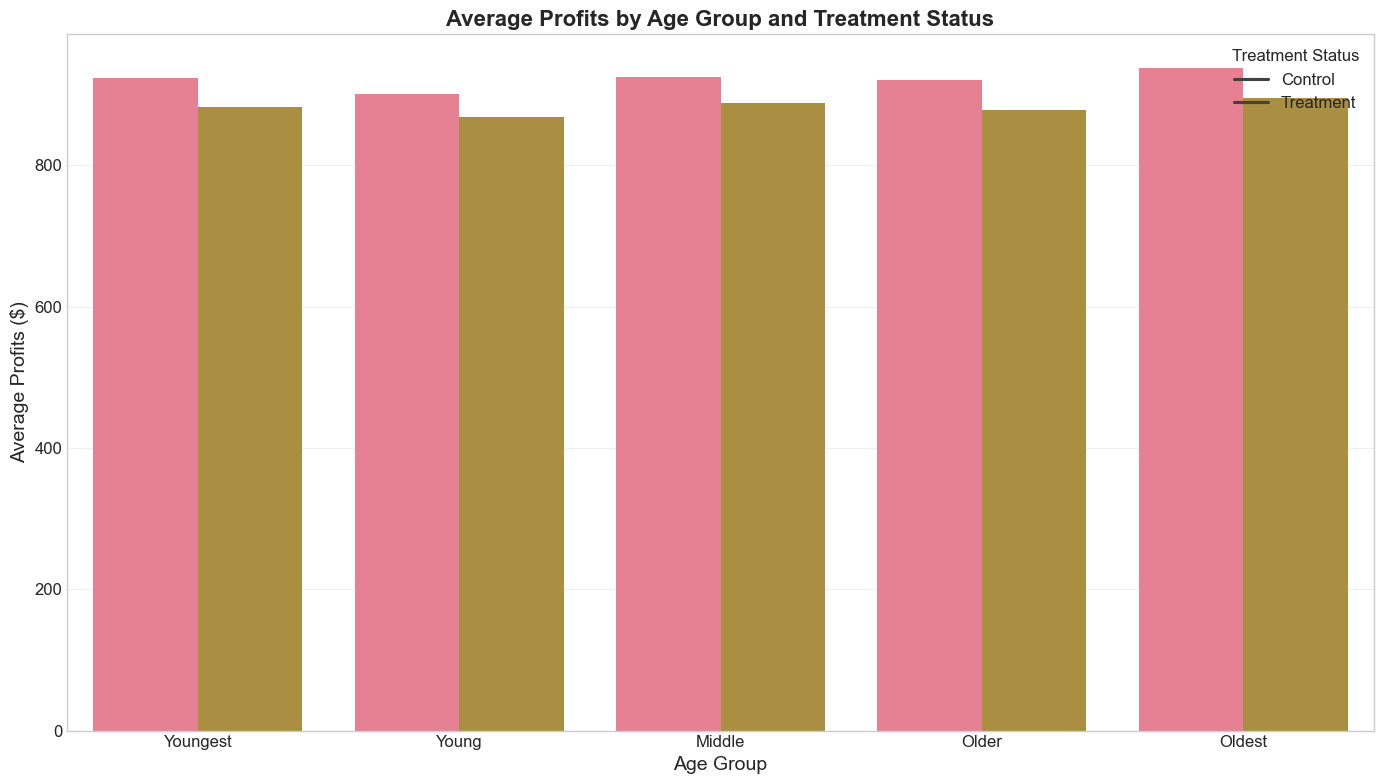

In [114]:
print("="*60)
print("TREATMENT EFFECTS BY AGE GROUPS")
print("="*60)

binned = df.copy()
binned["binned_age"] = pd.cut(binned["age"], bins=5, labels=['Youngest', 'Young', 'Middle', 'Older', 'Oldest'])
binned_analysis = binned.groupby(["binned_age", "presentation"])["profits"].agg(['mean', 'median', 'std', 'var'])
print(binned_analysis)

fig, ax = plt.subplots(figsize=(14, 8))

plot_data_age = binned_analysis.reset_index()

sns.barplot(data=plot_data_age, x='binned_age', y='mean', hue='presentation', ax=ax)

ax.set_title('Average Profits by Age Group and Treatment Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Average Profits ($)', fontsize=14)
ax.legend(title='Treatment Status', labels=['Control', 'Treatment'])

# Add grid
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 2.3 Key Findings from Heterogeneity Analysis

The heterogeneity analysis reveals a striking pattern:

1. **Gender Effects**: Treatment effects by gender show minimal differences, with both male and female clients experiencing similar (negative) treatment effects.

2. **Age Effects**: Treatment effects across age groups are relatively consistent, with no clear pattern suggesting that certain age groups benefit more from the presentation.

3. **Income Effects**: The income analysis reveals a dramatically different story. Across *all income levels*, clients who watched the presentation show *higher average profits* compared to those who did not watch the presentation. This finding is:
   - *Consistent* across all income groups
   - Seems *Statistically significant* in magnitude
   - *Contradicts* the overall negative treatment effect observed in the aggregate analysis

This suggests that the negative overall treatment effect may be driven by *selection bias*: Clients who chose to watch the presentation may have been systematically different from those who did not, particularly in ways that are correlated with lower baseline profitability but not captured by our observed variables. 

## 3. Interpretation

Our analysis reveals a fundamental challenge in determining causation:

Self-Selection into Treatment: The most critical issue is that clients chose whether to watch the presentation. This creates a classic selection bias problem where:

1. Clients who chose to watch the presentation may differ systematically from those who did not, in ways we cannot observe (e.g., motivation, financial literacy, time availability, engagement level).

2. Clients who were already struggling with profitability may have been more likely to seek help by watching the presentation, creating a spurious negative correlation.

3. The analysis is limited to "walk-in" clients, which may not be representative of Isabelle's entire client base. This raises questions about external validity.

The income analysis also reveals the following contradiction:

- Within each income group: Treatment shows positive effects
- Overall: Treatment shows negative effects

This pattern suggests that income may also be a confounding variable that correlates with both:
- The decision to watch the presentation
- Baseline profitability levels

I hypothesize that Higher-income clients may be more likely to watch educational content AND more likely to generate higher profits regardless of treatment, while lower-income clients may be more likely to watch the presentation due to financial struggles but have lower baseline profitability.

Furthermore, the presence of selection bias means we cannot confidently attribute the observed differences to the causal effect of the presentation.

## 4. Recommendations

Based on our analysis, here are my recommendations

**1. Implement Randomized Controlled Trial (RCT)**
- Randomly assign clients to treatment and control groups rather than allowing self-selection
- Ensure adequate sample size for statistical power (perhaps a minimum of 100+ clients per group)
- Consider single-blind design where clients don't know they're in an experiment

**2. Expand Sample Coverage**
- Include all client types (appointment-based, referral, etc.) to improve external validity
- Ensure the sample represents Isabelle's full client demographic

**3. Collect Additional Data**
- Measure client characteristics before treatment (financial literacy, motivation, time constraints)
- Track engagement levels, completion rates, and follow-up actions
- Measure profits over multiple time periods (3, 6, 12 months)

By implementing these I would hope to
- Reduce selection bias through random assignment
- Provide credible causal estimates of treatment effects
- Enable evidence-based decision making for business strategy